# 4.10: Further Customer Analysis

## Contents:
1. Importing data
2. Addressing PII
3. Regional Spending Analysis
4. Filtering out low-activity customers
5. Creating representative sample for analysis
6. Customer profiling
7. Profile visualization
8. Profile aggregation
9. Profiles and regions
10. Focused visualizations of most common demographic profile: Married Parent, Middle-aged, Middle income (MP)(MA)(MI)
11. Crosstab consistency check

### 1. Importing data

In [5]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import plotly

ModuleNotFoundError: No module named 'plotly'

In [2]:
# creating path for data import

path = r'C:\Users\scott\Desktop\Data Analysis\CF Immersive\Python\Jan-2022 Instacart Basket Analysis'

In [3]:
# importing merged orders/products/customers dataframe

df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'final_sample_for_analysis.pkl'))

### 2. Addressing PII

#### The only PII in the across all datasets was First and Last names in the customer dataset. These were dropped in the script '4.9 IC Visualization Part 1'.

### 3. Regional Spending Analysis

#### Region breakdown: Northeast (ME,NH,VT,MA,RI,CT), Middle Atlantic (NY,PA,NJ), Midwest (WI,MI,IL,IN,OH,ND,SD,NE,KS,MN,IA,MO), South (DE,MD,DC,VA,WV,NC,SC,GA,FL,KY,TN,MS,AL,OK,TX,AR,LA), West (ID,MT,WY,NV,UT,CO,AZ,NM,AK,WA,OR,CA,HI)

In [ ]:
# list for Northeast states

northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut']

In [ ]:
# list for Middle Atlantic states

mid_atlantic = ['New York','Pennsylvania','New Jersey']

In [ ]:
# list for Midwest states

midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']

In [ ]:
# list for South states

south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [ ]:
# list for West states

west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [ ]:
# creating flag for Northeast customers

df.loc[df['STATE'].isin(northeast), 'Region'] = 'Northeast'

In [ ]:
# creating flag for Middle Atlantic customers

df.loc[df['STATE'].isin(mid_atlantic), 'Region'] = 'Mid-Atlantic'

In [ ]:
# creating flag for Midwest customers

df.loc[df['STATE'].isin(midwest), 'Region'] = 'Midwest'

In [ ]:
# creating flag for South customers

df.loc[df['STATE'].isin(south), 'Region'] = 'South'

In [ ]:
# creating flag for West customers

df.loc[df['STATE'].isin(west), 'Region'] = 'West'

In [ ]:
df['Region'].value_counts(dropna = False)

In [80]:
# creating crosstab to compare spending habits across regions, output normalized

region_spending_cross = pd.crosstab(df['Region'], df['spending_flag'], normalize = 'index', dropna = False)

In [59]:
# printing the crosstab 

region_spending_cross

spending_flag,High spender,Low spender
Region,,
Mid-Atlantic,0.015776,0.984224
Midwest,0.020459,0.979541
Northeast,0.020444,0.979556
South,0.019465,0.980535
West,0.019218,0.980782


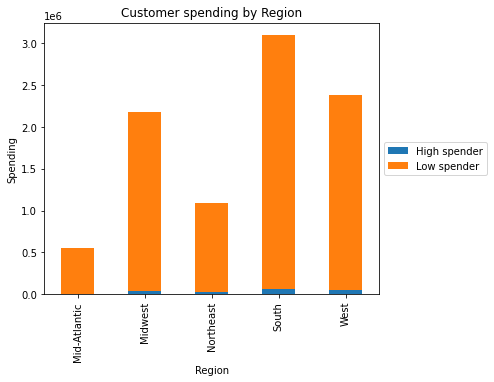

In [170]:
# stacked bar chart of regional spending

pd.crosstab(df['Region'], df['spending_flag'], dropna = False).plot(kind='bar',stacked=True, title='Customer spending by Region', ylabel='Spending', xlabel='Region', figsize=(6,5)).legend(loc='center left',bbox_to_anchor=(1.0,0.5))

#### All regions have are between 97% and 99% low spenders. The midwest has the highest percentage of high spenders with 2.05%.

In [59]:
import plotly.express as px
px.bar(plot_data, x='Region', y='user_id', color='loyalty_flag')


In [57]:
plot_data = df.groupby(['Region', 'loyalty_flag'])[['user_id']].nunique().reset_index(level=['Region','loyalty_flag'])

In [53]:
plot_data

,Region,loyalty_flag,user_id
0,Mid-Atlantic,Loyal customer,181789
1,Mid-Atlantic,New customer,85182
2,Mid-Atlantic,Regular customer,286212
3,Midwest,Loyal customer,711712
4,Midwest,New customer,341837
5,Midwest,Regular customer,1125873
6,Northeast,Loyal customer,369212
7,Northeast,New customer,167973
8,Northeast,Regular customer,548646
9,South,Loyal customer,1021142


In [41]:
pd.crosstab(df['Region'],df['loyalty_flag'])

loyalty_flag,Loyal customer,New customer,Regular customer
Region,,,
Mid-Atlantic,181789,85182,286212
Midwest,711712,341837,1125873
Northeast,369212,167973,548646
South,1021142,478446,1593333
West,797905,369042,1210164


In [29]:
plot_data.reset_index()

loyalty_flag,index,Loyal customer,New customer,Regular customer
0,0,181789,85182,286212
1,1,711712,341837,1125873
2,2,369212,167973,548646
3,3,1021142,478446,1593333
4,4,797905,369042,1210164


In [19]:
data_canada = px.data.gapminder().query("country == 'Canada'")

In [25]:
type(data_canada)

pandas.core.frame.DataFrame

In [26]:
type(plot_data)

pandas.core.frame.DataFrame

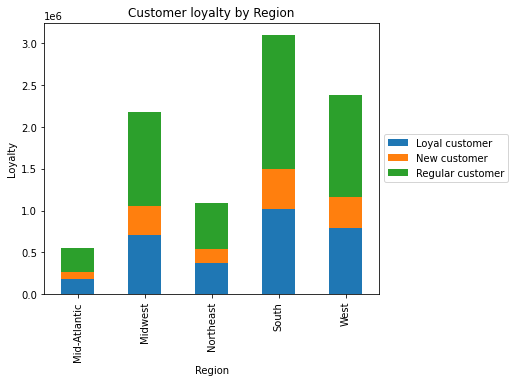

In [169]:
# stacked bar chart of regional customer loyalty

pd.crosstab(df['Region'],df['loyalty_flag']).plot(kind='bar',stacked=True, title='Customer loyalty by Region', ylabel='Loyalty', xlabel='Region', figsize=(6,5)).legend(loc='center left',bbox_to_anchor=(1.0,0.5))

In [6]:
# creating crosstab to compare spending habits across regions, output normalized

region_customers_cross = pd.crosstab(df['Region'], df['user_id'], normalize = 'index', dropna = False)

KeyboardInterrupt: 

<AxesSubplot:title={'center':'Regional Customer Distribution'}>

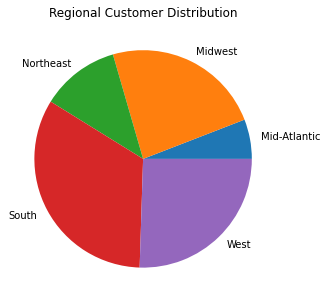

In [7]:
# creating regional distribution pie chart

df.groupby('Region')['user_id'].nunique().plot(kind='pie', title='Regional Customer Distribution', ylabel='', xlabel='', figsize=(6,5))

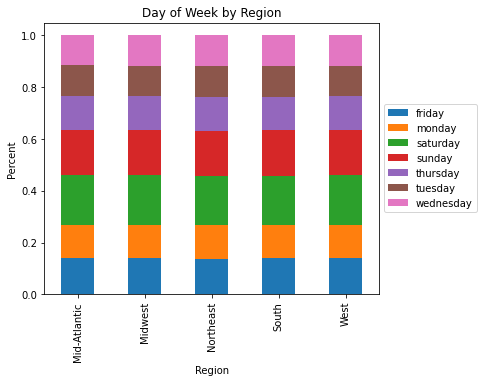

In [10]:
# creating region vs hour of day stacked bar

pd.crosstab(df['Region'],df['orders_day_of_week'], normalize='index').plot(kind='bar',stacked=True, title='Day of Week by Region', ylabel='Percent', xlabel='Region', figsize=(6,5)).legend(loc='center left',bbox_to_anchor=(1.0,0.5))

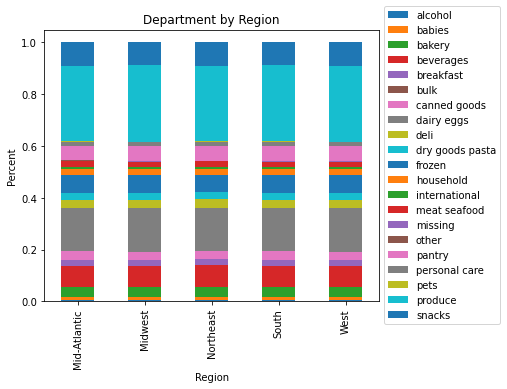

In [11]:
# creating region vs department stacked bar

pd.crosstab(df['Region'],df['department_id'], normalize='index').plot(kind='bar',stacked=True, title='Department by Region', ylabel='Percent', xlabel='Region', figsize=(6,5)).legend(loc='center left',bbox_to_anchor=(1.0,0.5))

### 4. Filtering out low-activity customers

In [5]:
# * Used old dataframe for this* creating flag for low-activity customers

df.loc[df['max_order'] < 5, 'Activity'] = 'low'

In [6]:
# * Used old dataframe for this* creating flag for high-activity customers

df.loc[df['max_order'] >= 5, 'Activity'] = 'high'

In [7]:
# * Used old dataframe for this* checking counts

df['Activity'].value_counts(dropna = False)

high    30964564
low      1440295
Name: Activity, dtype: int64

In [8]:
df.shape

(32404859, 32)

In [ ]:
# remove low activity customers

df = df[df['Activity' =  'high']]

In [ ]:
df.shape

#### 4.65% of customers are low-activity

In [ ]:
# exporting df with high activity customers and regions

df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_cust_high_activity_dept_names_Jan_25_2022.pkl'))

### 5. Creating representative sample for analysis

In [4]:
# Setting the random seed

np.random.seed(4)

In [5]:
# Creating random boolean list with 70% true and 30% false

dev = np.random.rand(len(df)) <= 0.7

In [6]:
# assigning true values to big dataframe

big = df[dev]

In [7]:
# assigning false values to small dataframe

small = df[~dev]

In [8]:
# checking length of df

len(df)

30964564

In [9]:
# checking length of big and small combined

len(big) + len(small)

30964564

In [10]:
# creating sample dataframe from small subset

df = small

In [12]:
# checking new df shape

df.shape

(9288468, 34)

In [11]:
# checking output of sample

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,STATE,Age,date_joined,n_dependants,fam_status,income,cust_merge,Region,Activity,Profile
0,2539329,1,1,monday,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,high,(MP)(YA)(LI)
2,473747,1,3,tuesday,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,high,(MP)(YA)(LI)
3,2254736,1,4,wednesday,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,high,(MP)(YA)(LI)
6,550135,1,7,sunday,9,20.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,high,(MP)(YA)(LI)
10,2539329,1,1,monday,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Alabama,31,2/17/2019,3,married,40423,both,South,high,(MP)(YA)(LI)


In [13]:
# exporting sample df

df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'sample_jan_27.pkl'))

### 6. Customer profiling

### 6a. Behavioral customer profiles

#### Profiles:
- (MS) Morning shopper majority orders from 05:00 - 12:00
- (AS) Afternoon shopper majority orders from 12:00 - 17:00
- (ES) Evening shopper majority orders from 17:00 - 21:00
- (NS) Night shopper majority orders from 21:00 - 05:00

#### Creating column of mean hour by user_id

In [14]:
# creating new dataframe that includes max hour, user_id, and grouped order_id

df_order_hour = df.groupby(['order_id','user_id'])['order_hour_of_day'].max().reset_index()

In [15]:
# checking df_order_hour

df_order_hour

,order_id,user_id,order_hour_of_day
0,2,202279,9
1,3,205970,17
2,4,178520,9
3,5,156122,16
4,7,142903,14
...,...,...,...
2646783,3421077,107102,10
2646784,3421078,70170,11
2646785,3421080,52726,11
2646786,3421081,117076,11


In [16]:
# now grouping df_order_hour by user_id

df_order_hour = df.groupby(['user_id'])[['order_hour_of_day']].mean()

In [17]:
# checking df_order_hour

df_order_hour

,order_hour_of_day
user_id,
1,9.941176
2,10.472727
3,16.535714
4,13.000000
7,13.661290
...,...
206203,16.025641
206206,16.904110
206207,12.864865


In [18]:
# turning df_order_hour into dictionary and selecting only key (hour_profile)

df_order_hour.to_dict()['order_hour_of_day']

{1: 9.941176470588236,
 2: 10.472727272727273,
 3: 16.535714285714285,
 4: 13.0,
 7: 13.661290322580646,
 10: 17.11320754716981,
 11: 10.290322580645162,
 12: 8.818181818181818,
 13: 15.321428571428571,
 14: 8.681818181818182,
 15: 11.318181818181818,
 16: 13.318181818181818,
 17: 13.840579710144928,
 18: 16.363636363636363,
 19: 14.296875,
 21: 10.970149253731343,
 22: 13.863636363636363,
 24: 13.545454545454545,
 26: 12.947368421052632,
 27: 12.429203539823009,
 28: 14.333333333333334,
 29: 10.984375,
 30: 11.428571428571429,
 31: 11.987012987012987,
 32: 13.82857142857143,
 34: 13.0,
 35: 15.568181818181818,
 36: 14.458333333333334,
 37: 14.36,
 38: 11.12280701754386,
 39: 13.72972972972973,
 40: 9.975,
 41: 15.3,
 42: 12.972222222222221,
 43: 15.076923076923077,
 46: 14.46808510638298,
 47: 11.5,
 48: 14.142857142857142,
 49: 13.277777777777779,
 50: 11.297297297297296,
 52: 10.327272727272728,
 54: 12.71,
 55: 13.607142857142858,
 56: 12.275,
 57: 10.68421052631579,
 58: 11.387096

In [19]:
# populating 'hour_avg' with dictionary values

df['hour_avg'] = df['user_id'].map(df_order_hour.to_dict()['order_hour_of_day'])

In [20]:
# checking df output

df.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,Age,date_joined,n_dependants,fam_status,income,cust_merge,Region,Activity,Profile,hour_avg
32404835,2409631,106143,7,sunday,0,14.0,19675,1,1,Organic Raspberry Black Tea,...,25,5/26/2017,0,single,53755,both,West,high,(SNC)(YA)(LI),13.625
32404841,1806098,106143,13,monday,12,6.0,19675,1,1,Organic Raspberry Black Tea,...,25,5/26/2017,0,single,53755,both,West,high,(SNC)(YA)(LI),13.625
32404848,3102310,106143,20,tuesday,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,25,5/26/2017,0,single,53755,both,West,high,(SNC)(YA)(LI),13.625
32404850,3308056,106143,22,wednesday,20,10.0,19675,1,1,Organic Raspberry Black Tea,...,25,5/26/2017,0,single,53755,both,West,high,(SNC)(YA)(LI),13.625
32404851,2988973,106143,23,monday,22,5.0,19675,1,1,Organic Raspberry Black Tea,...,25,5/26/2017,0,single,53755,both,West,high,(SNC)(YA)(LI),13.625


#### Creating profile flags

In [22]:
df['Behavior_Profile'] = ''

In [23]:
# creating flag for morning shopper

df.loc[(df['hour_avg'] >= 5) & (df['hour_avg'] <= 12) , 'Behavior_Profile'] = df['Behavior_Profile'] + '(MS)'

In [24]:
# creating flag for afternoon shopper

df.loc[(df['hour_avg'] > 12) & (df['hour_avg'] <= 17) , 'Behavior_Profile'] = df['Behavior_Profile'] + '(AS)'

In [25]:
# creating flag for evening shopper

df.loc[(df['hour_avg'] > 17) & (df['hour_avg'] <= 21) , 'Behavior_Profile'] = df['Behavior_Profile'] + '(ES)'

In [26]:
# creating flag for night shopper part 1

df.loc[(df['hour_avg'] > 21), 'Behavior_Profile'] = df['Behavior_Profile'] + '(NS)'

In [27]:
# creating flag for night shopper part 2

df.loc[(df['hour_avg'] < 5), 'Behavior_Profile'] = df['Behavior_Profile'] + '(NS)'

In [28]:
# checking counts

df['Behavior_Profile'].value_counts(dropna = False)

(AS)    6974293
(MS)    2038897
(ES)     270776
(NS)       4502
Name: Behavior_Profile, dtype: int64

In [31]:
# checking a user_id

df[df['user_id'] == 1]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,Age,date_joined,n_dependants,fam_status,income,cust_merge,Region,Activity,hour_avg,Behavior_Profile
0,2539329,1,1,monday,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,both,South,high,9.941176,(MS)
2,473747,1,3,tuesday,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,South,high,9.941176,(MS)
3,2254736,1,4,wednesday,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,South,high,9.941176,(MS)
6,550135,1,7,sunday,9,20.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,South,high,9.941176,(MS)
10,2539329,1,1,monday,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,31,2/17/2019,3,married,40423,both,South,high,9.941176,(MS)
12,2398795,1,2,tuesday,7,15.0,12427,3,1,Original Beef Jerky,...,31,2/17/2019,3,married,40423,both,South,high,9.941176,(MS)
13,473747,1,3,tuesday,12,21.0,12427,2,1,Original Beef Jerky,...,31,2/17/2019,3,married,40423,both,South,high,9.941176,(MS)
19,2295261,1,9,sunday,16,0.0,12427,6,1,Original Beef Jerky,...,31,2/17/2019,3,married,40423,both,South,high,9.941176,(MS)
21,2539329,1,1,monday,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,31,2/17/2019,3,married,40423,both,South,high,9.941176,(MS)
22,2398795,1,2,tuesday,7,15.0,26088,5,1,Aged White Cheddar Popcorn,...,31,2/17/2019,3,married,40423,both,South,high,9.941176,(MS)


### 6b. Demographic customer profiles

####  Demographic Profiles:
- (SA) Single adult, no children
- (MNC) Married, no children
- (SP) Single parent 
- (MP) Married parent
- (NP) New parent
- (YA) Young adult (under 35)
- (MA) Middle-aged (35 to 65)
- (E) Elderly (over 65)
- (LI) Low Income (25,000 - 68,000)
- (MI) Middle Income (68,000 - 128,000)
- (HI) High Income (128,000 - 600,000)

In [30]:
# deleting previous profile column

del df['Profile']

In [32]:
# creating Profile column

df['Demographic Profile'] = ''

In [33]:
# creating flag for single adult, no children

df.loc[(df['fam_status'] != 'married') & (df['n_dependants'] == 0), 'Demographic Profile'] = df['Demographic Profile'] + '(SNC)'

In [36]:
# creating flag for married adult, no children

df.loc[(df['fam_status'] == 'married') & (df['n_dependants'] == 0), 'Demographic Profile'] = df['Demographic Profile'] + '(MNC)'

In [37]:
# creating flag for single parent

df.loc[(df['fam_status'] != 'married') & (df['n_dependants'] > 0), 'Demographic Profile'] = df['Demographic Profile'] + '(SP)'

In [38]:
# creating flag for married parent

df.loc[(df['fam_status'] == 'married') & (df['n_dependants'] > 0), 'Demographic Profile'] = df['Demographic Profile'] + '(MP)'

In [39]:
# creating flag for new parent

df.loc[(df['department_id'] == 'babies') & (df['n_dependants'] > 0), 'Demographic Profile'] = df['Demographic Profile'] + '(NP)'

In [40]:
# creating flag for young adult

df.loc[(df['Age'] < 35), 'Demographic Profile'] = df['Demographic Profile'] + '(YA)'

In [41]:
# creating flag for middle-aged

df.loc[(df['Age'] >= 35) & (df['Age'] <= 65), 'Demographic Profile'] = df['Demographic Profile'] + '(MA)'

In [42]:
# creating flag for elderly

df.loc[(df['Age'] > 65), 'Demographic Profile'] = df['Demographic Profile'] + '(E)'

In [43]:
# creating flag for low income

df.loc[(df['income'] < 68000), 'Demographic Profile'] = df['Demographic Profile'] + '(LI)'

In [44]:
# creating flag for mid income

df.loc[(df['income'] >= 68000) & (df['income'] <= 128000), 'Demographic Profile'] = df['Demographic Profile'] + '(MI)'

In [45]:
# creating flag for high income

df.loc[(df['income'] > 128000), 'Demographic Profile'] = df['Demographic Profile'] + '(HI)'

In [46]:
# checking counts

df['Demographic Profile'].value_counts(dropna = False)

(MP)(MA)(MI)        1623868
(MP)(MA)(HI)        1035303
(MP)(E)(MI)          832503
(MP)(YA)(MI)         704938
(MP)(YA)(LI)         671128
(MP)(E)(HI)          662675
(MP)(MA)(LI)         661539
(SNC)(MA)(MI)        541916
(SNC)(MA)(HI)        359712
(SNC)(YA)(MI)        315302
(SNC)(YA)(LI)        296499
(SNC)(E)(MI)         281906
(SP)(YA)(MI)         230420
(MP)(E)(LI)          230001
(SNC)(MA)(LI)        228319
(SNC)(E)(HI)         216787
(SP)(YA)(LI)         203242
(SNC)(E)(LI)          72061
(MP)(NP)(MA)(MI)      24314
(MP)(YA)(HI)          15931
(MP)(NP)(MA)(HI)      14237
(MP)(NP)(E)(MI)       11391
(MP)(NP)(YA)(MI)       9604
(MP)(NP)(E)(HI)        9294
(MP)(NP)(YA)(LI)       8282
(MP)(NP)(MA)(LI)       7078
(SNC)(YA)(HI)          6818
(SP)(YA)(HI)           5353
(SP)(NP)(YA)(MI)       3395
(SP)(NP)(YA)(LI)       2427
(MP)(NP)(E)(LI)        1960
(MP)(NP)(YA)(HI)        197
(SP)(NP)(YA)(HI)         68
Name: Demographic Profile, dtype: int64

In [53]:
# checking output with all profiles

df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,Age,date_joined,n_dependants,fam_status,income,cust_merge,Region,Activity,Behavior_Profile,Demographic Profile
0,2539329,1,1,monday,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,both,South,high,(MS),(MP)(YA)(LI)
2,473747,1,3,tuesday,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,South,high,(MS),(MP)(YA)(LI)
3,2254736,1,4,wednesday,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,South,high,(MS),(MP)(YA)(LI)
6,550135,1,7,sunday,9,20.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,South,high,(MS),(MP)(YA)(LI)
10,2539329,1,1,monday,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,31,2/17/2019,3,married,40423,both,South,high,(MS),(MP)(YA)(LI)


In [51]:
# checking a user_id

df[df['user_id'] == 1]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,fam_status,income,cust_merge,Region,Activity,hour_avg,Behavior_Profile,Demographic Profile
0,2539329,1,1,monday,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,both,South,high,9.941176,(MS),(MP)(YA)(LI)
2,473747,1,3,tuesday,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,high,9.941176,(MS),(MP)(YA)(LI)
3,2254736,1,4,wednesday,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,high,9.941176,(MS),(MP)(YA)(LI)
6,550135,1,7,sunday,9,20.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,high,9.941176,(MS),(MP)(YA)(LI)
10,2539329,1,1,monday,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,2/17/2019,3,married,40423,both,South,high,9.941176,(MS),(MP)(YA)(LI)
12,2398795,1,2,tuesday,7,15.0,12427,3,1,Original Beef Jerky,...,2/17/2019,3,married,40423,both,South,high,9.941176,(MS),(MP)(YA)(LI)
13,473747,1,3,tuesday,12,21.0,12427,2,1,Original Beef Jerky,...,2/17/2019,3,married,40423,both,South,high,9.941176,(MS),(MP)(YA)(LI)
19,2295261,1,9,sunday,16,0.0,12427,6,1,Original Beef Jerky,...,2/17/2019,3,married,40423,both,South,high,9.941176,(MS),(MP)(YA)(LI)
21,2539329,1,1,monday,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,2/17/2019,3,married,40423,both,South,high,9.941176,(MS),(MP)(YA)(LI)
22,2398795,1,2,tuesday,7,15.0,26088,5,1,Aged White Cheddar Popcorn,...,2/17/2019,3,married,40423,both,South,high,9.941176,(MS),(MP)(YA)(LI)


In [52]:
# deleting unnecessary columns

del df['hour_avg']

In [54]:
# exporting sample dataframe with profiles

df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final_sample_for_analysis.pkl'))

### 7. Profile visualization

In [14]:
# import final_sample_for_analysis.pkl

df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'final_sample_for_analysis.pkl'))

#### Demographics:

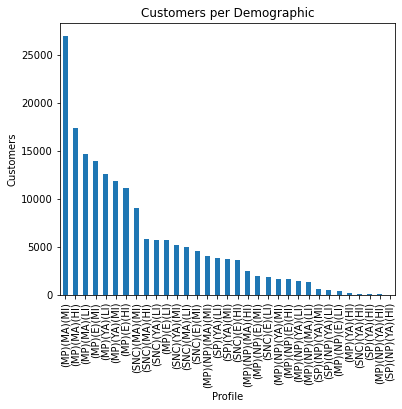

In [57]:
# bar chart of number of customers per demographic profile

bar_cust_per_demo = df.groupby('Demographic Profile')['user_id'].nunique().sort_values(ascending= False).plot(kind='bar', title='Customers per Demographic', ylabel='Customers', xlabel='Profile', figsize=(6,5))

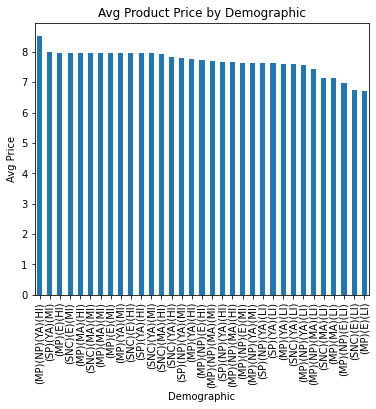

In [83]:
# bar chart of customer profiles vs. average product prices

bar_demo_avg_price = df.groupby(['Demographic Profile'])['prices'].mean().sort_values(ascending= False).plot(kind='bar', title='Avg Product Price by Demographic', ylabel='Avg Price', xlabel='Demographic', figsize=(6,5))

<AxesSubplot:title={'center':'Total Spent by Demographic'}, xlabel='Demographic', ylabel='Total Spent'>

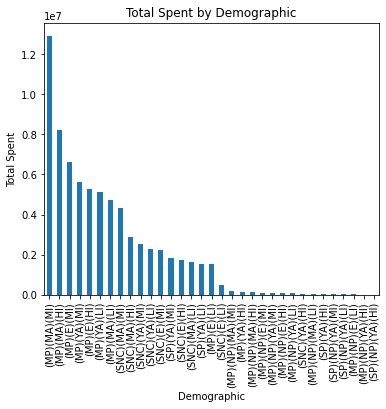

In [84]:
# bar chart of profiles vs. total amount spent

df.groupby(['Demographic Profile'])['prices'].sum().sort_values(ascending= False).plot(kind='bar', title='Total Spent by Demographic', ylabel='Total Spent', xlabel='Demographic', figsize=(6,5))

<AxesSubplot:title={'center':'Days since last order by Demographic'}, xlabel='Demographic', ylabel='Mean days'>

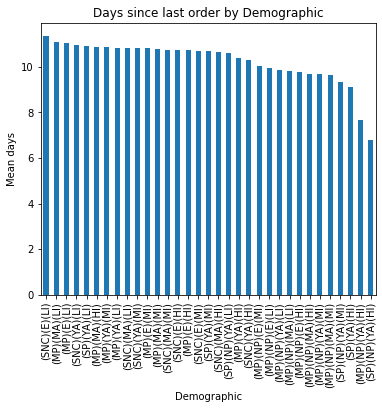

In [100]:
# bar chart of profiles vs. mean days since last order

df.groupby(['Demographic Profile'])['days_since_last_order'].mean().sort_values(ascending= False).plot(kind='bar', title='Days since last order by Demographic', ylabel='Mean days', xlabel='Demographic', figsize=(6,5))

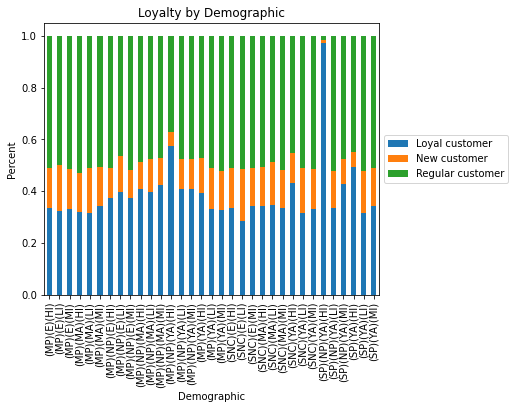

In [17]:
# stacked bar chart of demographic profiles vs. loyalty

pd.crosstab(df['Demographic Profile'],df['loyalty_flag'], normalize='index').plot(kind='bar',stacked=True, title='Loyalty by Demographic', ylabel='Percent', xlabel='Demographic', figsize=(6,5)).legend(loc='center left',bbox_to_anchor=(1.0,0.5))

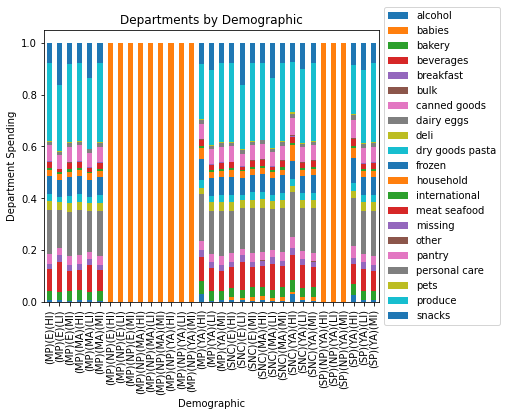

In [87]:
# stacked bar chart of demographic profiles vs. departments

pd.crosstab(df['Demographic Profile'],df['department_id'], normalize='index').plot(kind='bar',stacked=True, title='Departments by Demographic', ylabel='Department Spending', xlabel='Demographic', figsize=(6,5)).legend(loc='center left',bbox_to_anchor=(1.0,0.5))

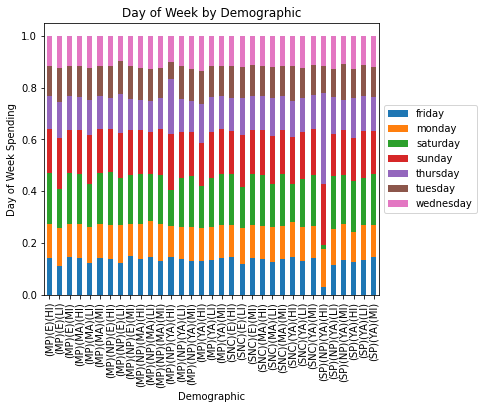

In [88]:
# stacked bar of customer profiles vs. order day of week (HOW TO SORT, HOW TO MOVE LEGEND)

stacked_demo_dow = pd.crosstab(df['Demographic Profile'],df['orders_day_of_week'], normalize='index').plot(kind='bar',stacked=True, title='Day of Week by Demographic', ylabel='Day of Week Spending', xlabel='Demographic', figsize=(6,5)).legend(loc='center left',bbox_to_anchor=(1.0,0.5))

#### Behavior:

<AxesSubplot:title={'center':'Customers per Behavior Profile'}, ylabel='Customers'>

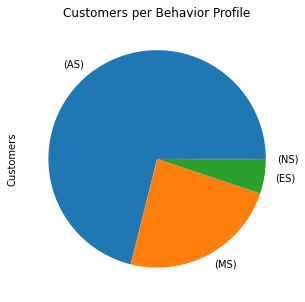

In [90]:
# pie chart of number of customers per behavior profile

df.groupby('Behavior_Profile')['user_id'].nunique().sort_values(ascending= False).plot(kind='pie', title='Customers per Behavior Profile', ylabel='Customers', xlabel='Profile', figsize=(6,5))

<AxesSubplot:title={'center':'Avg Product Price by Behavior Profile'}, xlabel='Profile', ylabel='Avg Price'>

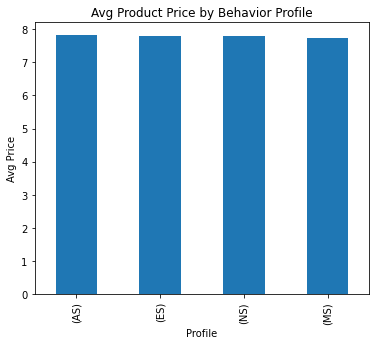

In [92]:
# bar chart of profiles vs. average product prices

df.groupby(['Behavior_Profile'])['prices'].mean().sort_values(ascending= False).plot(kind='bar', title='Avg Product Price by Behavior Profile', ylabel='Avg Price', xlabel='Profile', figsize=(6,5))

<AxesSubplot:title={'center':'Total Spent by Behavior Profile'}, ylabel='Total Spent'>

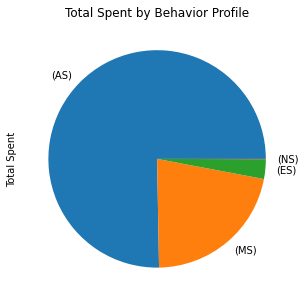

In [93]:
# pie chart of profiles vs. total amount spent

df.groupby(['Behavior_Profile'])['prices'].sum().sort_values(ascending= False).plot(kind='pie', title='Total Spent by Behavior Profile', ylabel='Total Spent', xlabel='Profile', figsize=(6,5))

<AxesSubplot:title={'center':'Days since last order by Behavior Profile'}, xlabel='Profile', ylabel='Mean days'>

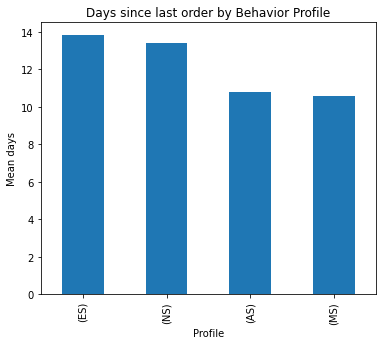

In [99]:
# bar chart of profiles vs. mean days since last order

df.groupby(['Behavior_Profile'])['days_since_last_order'].mean().sort_values(ascending= False).plot(kind='bar', title='Days since last order by Behavior Profile', ylabel='Mean days', xlabel='Profile', figsize=(6,5))

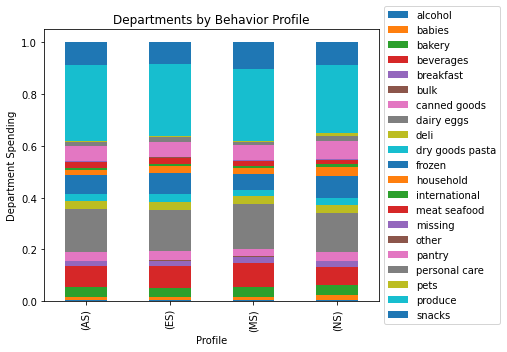

In [94]:
# stacked bar chart of profiles vs. departments

stacked_demo_spending = pd.crosstab(df['Behavior_Profile'],df['department_id'], normalize='index').plot(kind='bar',stacked=True, title='Departments by Behavior Profile', ylabel='Department Spending', xlabel='Profile', figsize=(6,5)).legend(loc='center left',bbox_to_anchor=(1.0,0.5))

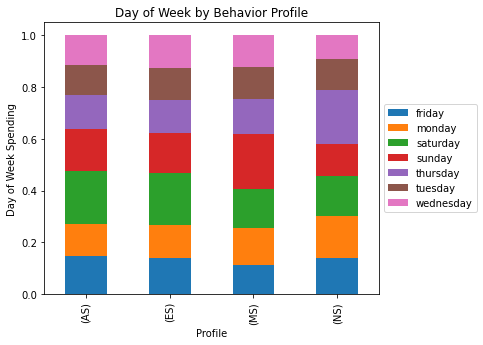

In [95]:
# stacked bar of profiles vs. order day of week

stacked_demo_dow = pd.crosstab(df['Behavior_Profile'],df['orders_day_of_week'], normalize='index').plot(kind='bar',stacked=True, title='Day of Week by Behavior Profile', ylabel='Day of Week Spending', xlabel='Profile', figsize=(6,5)).legend(loc='center left',bbox_to_anchor=(1.0,0.5))

#### Demographics vs. Behavior

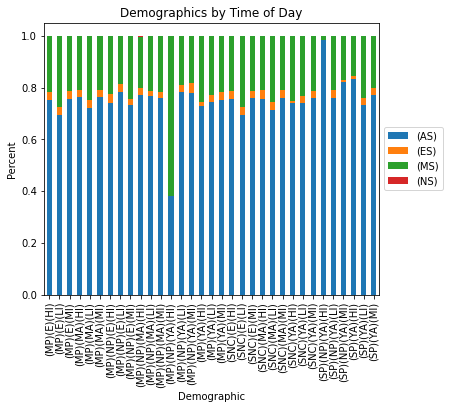

In [13]:
# bar chart of behavior profiles by demographic

pd.crosstab(df['Demographic Profile'],df['Behavior_Profile'],normalize='index').plot(kind='bar',stacked=True, title='Demographics by Time of Day', ylabel='Percent', xlabel='Demographic', figsize=(6,5)).legend(loc='center left',bbox_to_anchor=(1.0,0.5))

### 8. Profile aggregation

#### Demographics:

In [96]:
# aggregating profiles by prices

df.groupby(['Demographic Profile']).prices.agg(['min','max','mean','sum']).sort_values(by='sum',ascending=False)

,min,max,mean,sum
Demographic Profile,,,,
(MP)(MA)(MI),1.0,25.0,7.957650,1.292159e+07
(MP)(MA)(HI),1.0,25.0,7.961742,8.238962e+06
(MP)(E)(MI),1.0,25.0,7.956758,6.623826e+06
(MP)(YA)(MI),1.0,25.0,7.955502,5.607650e+06
(MP)(E)(HI),1.0,25.0,7.967074,5.277820e+06
(MP)(YA)(LI),1.0,25.0,7.609694,5.107064e+06
(MP)(MA)(LI),1.0,25.0,7.135591,4.720464e+06
(SNC)(MA)(MI),1.0,25.0,7.957919,4.312332e+06
(SNC)(MA)(HI),1.0,25.0,7.943412,2.856086e+06


In [97]:
# aggregating profiles by days since last order

df.groupby(['Demographic Profile']).days_since_last_order.agg(['min','max','mean']).sort_values(by='mean',ascending=True)

,min,max,mean
Demographic Profile,,,
(SP)(NP)(YA)(HI),2.0,30.0,6.805970
(MP)(NP)(YA)(HI),0.0,30.0,7.684210
(SP)(YA)(HI),0.0,30.0,9.095257
(SP)(NP)(YA)(MI),0.0,30.0,9.349368
(MP)(NP)(MA)(MI),0.0,30.0,9.639380
(MP)(NP)(YA)(MI),0.0,30.0,9.670046
(MP)(NP)(MA)(HI),0.0,30.0,9.681396
(MP)(NP)(E)(HI),0.0,30.0,9.792418
(MP)(NP)(MA)(LI),0.0,30.0,9.827275


#### Behavior:

In [101]:
# aggregating profiles by prices

df.groupby(['Behavior_Profile']).prices.agg(['min','max','mean','sum']).sort_values(by='sum',ascending=False)

,min,max,mean,sum
Behavior_Profile,,,,
(AS),1.0,25.0,7.812762,5.447987e+07
(MS),1.0,25.0,7.721058,1.573989e+07
(ES),1.0,25.0,7.792901,2.109803e+06
(NS),1.0,25.0,7.786689,3.504010e+04


In [102]:
# aggregating profiles by days since last order

df.groupby(['Behavior_Profile']).days_since_last_order.agg(['min','max','mean']).sort_values(by='mean',ascending=True)

,min,max,mean
Behavior_Profile,,,
(MS),0.0,30.0,10.576168
(AS),0.0,30.0,10.771400
(NS),0.0,30.0,13.423454
(ES),0.0,30.0,13.811994


### 9. Profiles and Regions

#### Demographics:

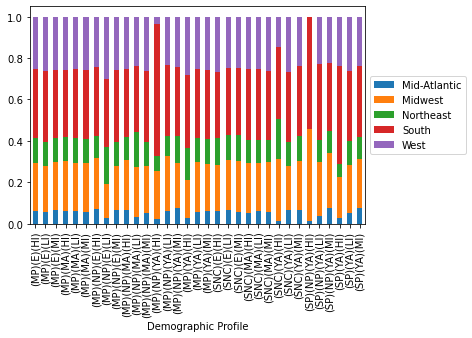

In [15]:
# creating bar chart of demographic profiles by region

pd.crosstab(df['Demographic Profile'],df['Region'], normalize='index').plot(kind='bar',stacked=True).legend(loc='center left',bbox_to_anchor=(1.0,0.5))

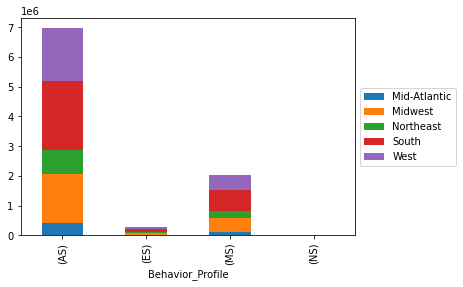

In [168]:
# creating bar chart of behavior profiles by region

pd.crosstab(df['Behavior_Profile'],df['Region']).plot(kind='bar',stacked=True).legend(loc='center left',bbox_to_anchor=(1.0,0.5))

### 10. Focused visualizations of most common demographic profile: Married Parent, Middle-aged, Middle income (MP)(MA)(MI)

In [121]:
# creating df of only (MP)(MA)(MI)

df_2 = df[df['Demographic Profile'] == '(MP)(MA)(MI)']

In [122]:
# checking shape to match profile value counts

df_2.shape

(1623868, 35)

<AxesSubplot:title={'center':'Total Spent by Department by (MP)(MA)(MI)'}, xlabel='Department', ylabel='Total Spent'>

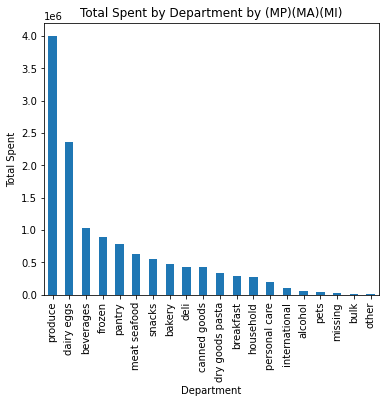

In [128]:
# bar chart of total spent by departments

df_2.groupby(['department_id'])['prices'].sum().sort_values(ascending=False).plot(kind='bar', title='Total Spent by Department by (MP)(MA)(MI)', ylabel='Total Spent', xlabel='Department', figsize=(6,5))

In [158]:
# changing order of index for descending sort on stacked bar chart below

df_2_pivot = df_2.pivot_table(index='department_id', columns='orders_day_of_week', values='prices', aggfunc='sum', fill_value=0).reindex(index = ['produce','dairy eggs','beverages','frozen','pantry','meat seafood','snacks','bakery','deli','canned goods','dry goods pasta','breakfast','household','personal care','international','alcohol','pets','missing','bulk','other'])

<AxesSubplot:title={'center':'Total Spent by Department/ Day of Week by (MP)(MA)(MI)'}, xlabel='Department', ylabel='Total Spent'>

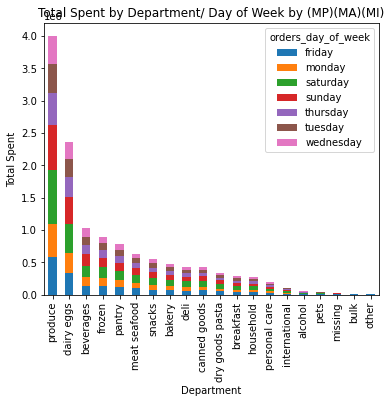

In [160]:
# bar chart of total spent by departments and day of week

df_2_pivot.plot.bar(stacked=True, title='Total Spent by Department/ Day of Week by (MP)(MA)(MI)', ylabel='Total Spent', xlabel='Department', figsize=(6,5))

<AxesSubplot:title={'center':'Total Spent by DOW by (MP)(MA)(MI)'}, xlabel='Department', ylabel='Total Spent'>

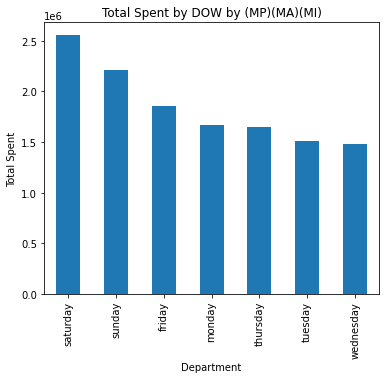

In [161]:
# bar chart of total spent by day of week

df_2.groupby(['orders_day_of_week'])['prices'].sum().sort_values(ascending=False).plot(kind='bar', title='Total Spent by DOW by (MP)(MA)(MI)', ylabel='Total Spent', xlabel='Department', figsize=(6,5))

<AxesSubplot:title={'center':'Total Spent by Behavior Profile by (MP)(MA)(MI)'}, ylabel='Total Spent'>

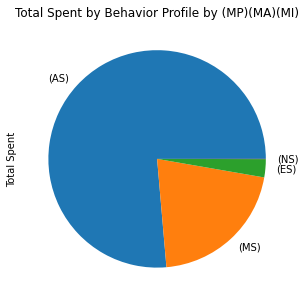

In [164]:
# pie chart of (MP)(MA)(MI) by behavior profile

df_2.groupby(['Behavior_Profile'])['prices'].sum().sort_values(ascending= False).plot(kind='pie', title='Total Spent by Behavior Profile by (MP)(MA)(MI)', ylabel='Total Spent', xlabel='Profile', figsize=(6,5))

<AxesSubplot:title={'center':'Total Spent by DOW by (MP)(MA)(MI)'}, xlabel='Department', ylabel='Total Spent'>

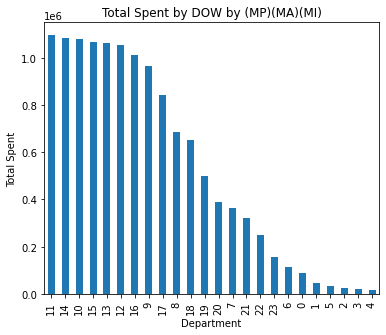

In [163]:
# bar chart of total spent by hour of day

df_2.groupby(['order_hour_of_day'])['prices'].sum().sort_values(ascending=False).plot(kind='bar', title='Total Spent by DOW by (MP)(MA)(MI)', ylabel='Total Spent', xlabel='Department', figsize=(6,5))

### 11. Crosstab consistency check

In [5]:
# creating crosstab to check consistency of 'days_since_last_order' column

crosstab = pd.crosstab(df['days_since_last_order'], df['order_number'], dropna = False)

In [6]:
crosstab

order_number,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
days_since_last_order,,,,,,,,,,,,,,,,,,,,,
0.0,0,20536,20441,17984,16438,16046,14384,13890,12774,11460,...,1195,1148,1040,937,1134,1099,1041,883,1037,935
1.0,0,31674,29950,28010,27092,25533,24996,22921,21783,21067,...,2787,2801,2728,2605,2606,2639,2436,2535,2633,2363
2.0,0,46454,46264,43902,40729,40907,38101,37519,35745,33830,...,3623,3555,3314,3589,3319,3072,2985,3057,3091,2609
3.0,0,61637,63388,59996,57882,56183,52869,49291,48295,47826,...,3318,3237,2799,3073,2902,2635,2658,2462,2168,2467
4.0,0,76733,78861,73540,70519,66569,62399,61143,59499,57700,...,2342,2260,2490,2031,1800,2083,1918,1792,1695,1810
5.0,0,88999,91741,86503,81859,77583,73584,70020,64468,63154,...,1630,1630,1367,983,1215,1220,1166,966,912,936
6.0,0,120681,122871,114644,106764,100756,95954,89752,87203,78634,...,754,842,940,1014,835,570,490,602,485,542
7.0,0,184802,181656,167597,157442,143628,137675,128423,120734,114769,...,634,573,521,440,602,421,420,378,419,322
8.0,0,112324,110742,102217,94945,87611,81622,78760,71070,67567,...,238,262,228,244,275,232,234,143,137,84


In [7]:
crosstab.to_clipboard()